<h1>U.S. Department of Agriculture Food Database Analysis</h1>

<h3>Visuzlize nutritional information from the U.S. Department of Agriculture Food Database, showcasing insights into a wide variety of food items. This notebook based on <code>usafood_handler.py</code> script logic.</h3>

In [3]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

In [4]:
db = json.load(open('../datasets/usa_food/usafood_db.json'))

Create a DataFrame with specific columns for extraction 

In [6]:
info = pd.DataFrame(db, columns=['id', 'description', 'group', 'manufacturer'])
info

,id,description,group,manufacturer
0,1008,"Cheese, caraway",Dairy and Egg Products,
1,1009,"Cheese, cheddar",Dairy and Egg Products,
2,1018,"Cheese, edam",Dairy and Egg Products,
3,1019,"Cheese, feta",Dairy and Egg Products,
4,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
...,...,...,...,...
6631,42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,
6633,43408,"Babyfood, juice, pear",Baby Foods,None
6634,43539,"Babyfood, dessert, banana yogurt, strained",Baby Foods,None


In [7]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6636 non-null   int64 
 1   description   6636 non-null   object
 2   group         6636 non-null   object
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


Collect all products nutriens

In [9]:
nutriens = [pd.DataFrame(rec['nutrients']).assign(id=rec['id']) for rec in db]

Concat all objects

In [11]:
nutriens = pd.concat(nutriens, ignore_index=True)
nutriens = nutriens.drop_duplicates()

Rename coulmns with the same names

In [13]:
info = info.rename(
    columns={'description': 'food', 'group': 'food_group'},
    copy=False,
)

In [14]:
nutriens = nutriens.rename(
    columns={'description': 'nutrient', 'group': 'nut_group'},
    copy=False,
)

Merge two DataFrames on the 'id' column, using an outer join to include all matching and non-matching rows

In [16]:
nutriens_data = pd.merge(nutriens, info, on='id', how='outer')
nutriens_data

,value,units,nutrient,nut_group,id,food,food_group,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,93600,"Turtle, green, raw",Finfish and Shellfish Products,None
375172,50.000,mg,Cholesterol,Other,93600,"Turtle, green, raw",Finfish and Shellfish Products,None
375173,0.127,g,"Fatty acids, total saturated",Other,93600,"Turtle, green, raw",Finfish and Shellfish Products,None
375174,0.088,g,"Fatty acids, total monounsaturated",Other,93600,"Turtle, green, raw",Finfish and Shellfish Products,None


Plotting median zinc values in food groups

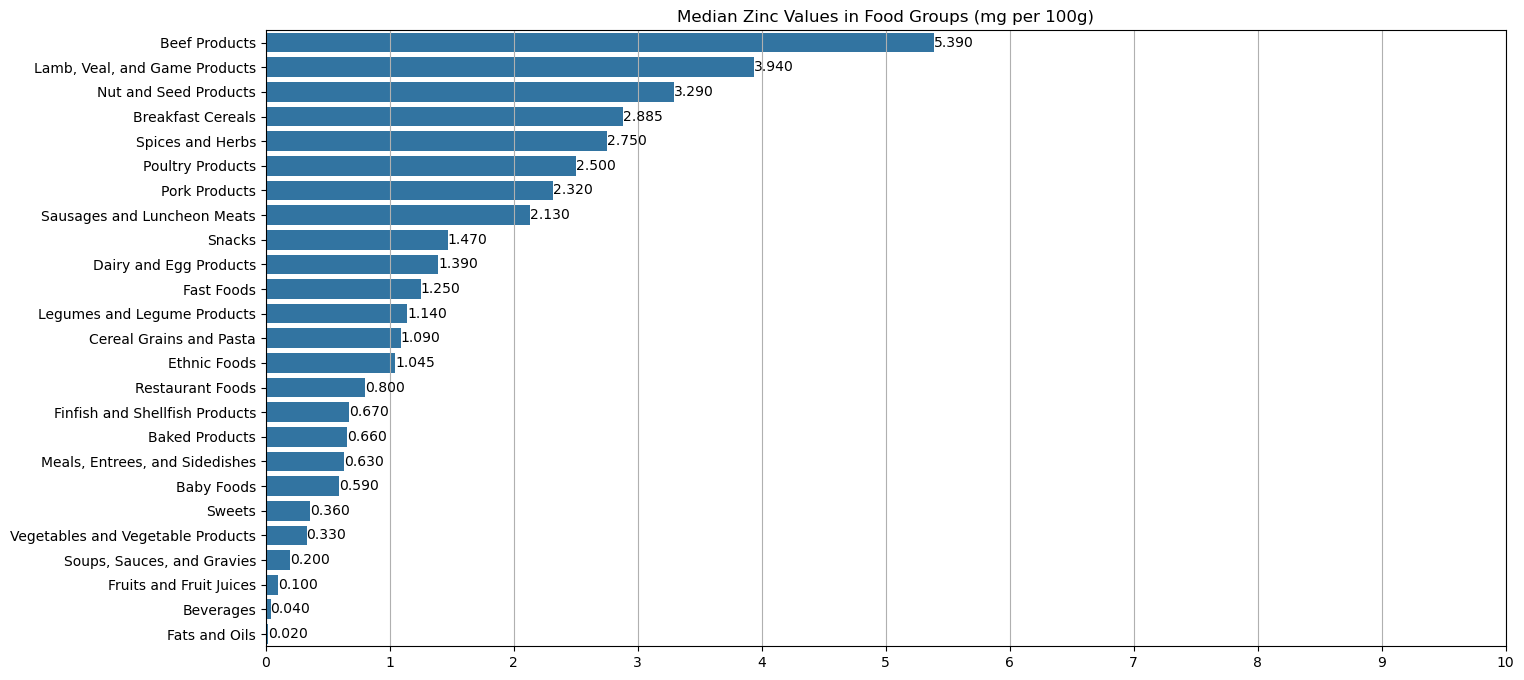

In [18]:
plt.figure(figsize=(16, 8))

# Get grouped average nutrient values
ave_nutr_data = nutriens_data.groupby(['nutrient', 'food_group'])['value'].quantile(0.5)

# Extract Zinc values for visualization
ave_nutr_zinc = ave_nutr_data['Zinc, Zn'].sort_values(ascending=False)

sns.barplot(
    x=ave_nutr_zinc.values,
    y=ave_nutr_zinc.index,
)

# Add value as plot label
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f')

plt.xlim(0, 10)
plt.xticks(range(0, 11, 1))
plt.ylabel(None)
plt.title("Median Zinc Values in Food Groups (mg per 100g)")

plt.grid(axis='x')
plt.show()

Create table with all nutriens amount

In [20]:
nutr_amount = pd.pivot_table(
    nutriens_data,
    values='value',
    index='food_group',
    columns='nutrient',
    aggfunc=lambda x: np.percentile(x, 50),
    dropna=True,
    fill_value=0,
)
nutr_amount

nutrient,Adjusted Protein,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-sitosterol,Betaine,Caffeine,"Calcium, Ca",...,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (phylloquinone),Water,"Zinc, Zn"
food_group,,,,,,,,,,,,,,,,,,,,,
Baby Foods,0.00,0.0850,0.0,0.1040,0.620,0.2200,0.0,0.60,0.0,62.0,...,9.60,37.0,0.90,0.00,0.00,0.840,0.41,5.30,81.960,0.590
Baked Products,0.00,0.2480,0.0,0.2985,1.800,0.3965,17.0,20.00,0.0,51.0,...,0.00,0.0,0.00,0.00,0.00,0.470,0.00,4.40,18.075,0.660
Beef Products,0.00,1.5500,0.0,1.6670,1.060,2.3605,0.0,13.90,0.0,12.0,...,0.00,5.0,0.10,0.00,0.10,0.280,0.00,1.50,62.015,5.390
Beverages,0.00,0.0030,0.0,0.0000,0.200,0.0050,0.0,0.10,0.0,8.0,...,0.25,0.0,0.00,1.00,0.00,0.000,0.00,0.00,87.000,0.040
Breakfast Cereals,0.00,0.3110,0.0,0.2800,2.390,0.4650,0.0,13.75,0.0,47.0,...,0.10,68.0,1.70,0.00,3.70,0.550,0.00,1.20,3.760,2.885
Cereal Grains and Pasta,0.00,0.3730,0.0,0.4110,0.730,0.4830,0.0,23.10,0.0,19.0,...,0.00,0.0,0.00,0.00,0.00,0.120,0.00,0.30,11.920,1.090
Dairy and Egg Products,0.00,0.2710,0.0,0.2985,1.600,0.6400,0.0,0.70,0.0,193.0,...,0.00,13.0,0.30,1.10,0.45,0.160,0.00,1.10,66.720,1.390
Ethnic Foods,0.00,1.2900,0.0,1.3100,1.300,2.1375,4.0,7.50,0.0,17.5,...,0.00,0.0,0.00,0.00,0.00,0.470,0.00,0.30,69.600,1.045
Fast Foods,0.00,0.5140,0.0,0.5890,2.100,0.8990,0.0,15.40,0.0,79.0,...,0.60,3.0,0.10,0.00,0.20,0.700,0.00,6.90,49.720,1.250


Filter columns by vitamins

In [22]:
vit_amount = nutr_amount.filter(like='Vitamin', axis=1)
vit_amount

nutrient,"Vitamin A, IU","Vitamin A, RAE",Vitamin B-12,"Vitamin B-12, added",Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin D2 (ergocalciferol),Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (phylloquinone)
food_group,,,,,,,,,,,,,
Baby Foods,239.5,58.0,0.190,0.000,0.0750,9.60,37.0,0.90,0.00,0.00,0.840,0.41,5.30
Baked Products,15.0,1.0,0.030,0.000,0.0600,0.00,0.0,0.00,0.00,0.00,0.470,0.00,4.40
Beef Products,0.0,0.0,2.610,0.000,0.3950,0.00,5.0,0.10,0.00,0.10,0.280,0.00,1.50
Beverages,0.0,0.0,0.000,0.000,0.0115,0.25,0.0,0.00,1.00,0.00,0.000,0.00,0.00
Breakfast Cereals,909.0,225.0,0.800,3.965,1.0000,0.10,68.0,1.70,0.00,3.70,0.550,0.00,1.20
Cereal Grains and Pasta,0.0,0.0,0.000,0.000,0.1320,0.00,0.0,0.00,0.00,0.00,0.120,0.00,0.30
Dairy and Egg Products,372.0,73.5,0.530,0.000,0.0610,0.00,13.0,0.30,1.10,0.45,0.160,0.00,1.10
Ethnic Foods,248.5,15.5,2.570,0.000,0.1680,0.00,0.0,0.00,0.00,0.00,0.470,0.00,0.30
Fast Foods,213.0,39.0,0.550,0.000,0.1275,0.60,3.0,0.10,0.00,0.20,0.700,0.00,6.90


Plotting vitamins values in food groups

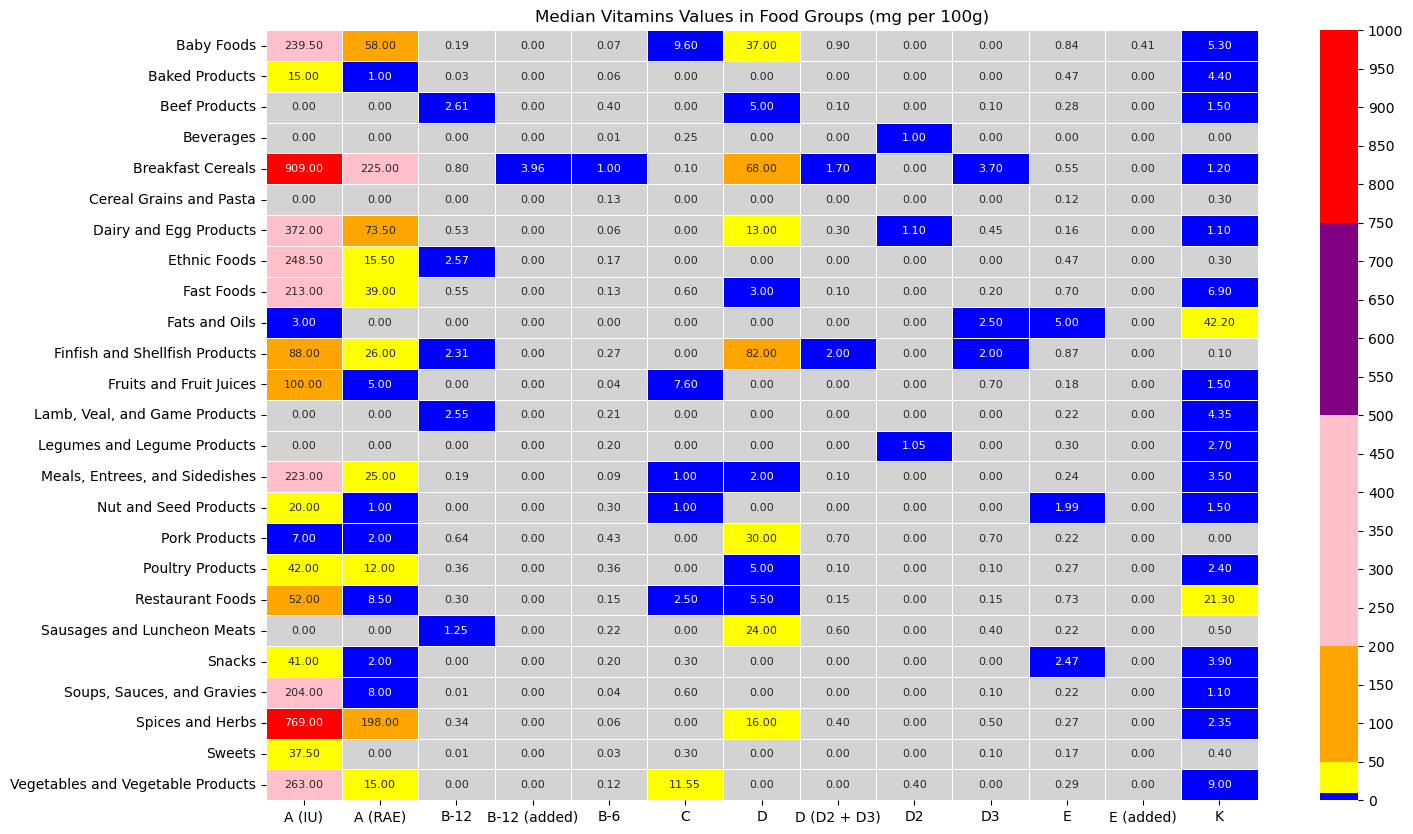

In [24]:
plt.figure(figsize=(16, 10))

# Define color thresholds and corresponding Seaborn heatmap colors
heatmap_colors = {
    (750.0,): 'red',
    (500.0,): 'purple',
    (200.0,): 'pink',
    (50.0,): 'orange',
    (10.0,): 'yellow',
    (1.0,): 'blue',
}

# Create the custom ListedColormap using the colors from heatmap_colors dictionary
custom_map = ListedColormap(
    [
        next((color for key, color in heatmap_colors.items() if x >= key), 'lightgray')
        for x in np.linspace(start=0, stop=1000, num=1000)
    ]
)

# Create a heatmap
sns.heatmap(
    vit_amount,
    annot=True,
    cmap=custom_map,
    fmt='.2f',
    vmin=0.0,
    vmax=1000.0,
    xticklabels=[
        "A (IU)",
        "A (RAE)",
        "B-12",
        "B-12 (added)",
        "B-6",
        "C",
        "D",
        "D (D2 + D3)",
        "D2",
        "D3",
        "E",
        "E (added)",
        "K",
    ],
    annot_kws={'fontsize': 8},
    linewidth=0.5,
    cbar_kws={'ticks': np.arange(0, 1050, 50)},
)

plt.xlabel(None)
plt.ylabel(None)
plt.title("Median Vitamins Values in Food Groups (mg per 100g)")

plt.show()